In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
nhl_data = pd.read_excel("NHL_2010-2020_Data.xlsx")

In [3]:
nhl_data = nhl_data.replace(to_replace='--', value=0)
nhl_data = nhl_data.replace(to_replace="Phoenix Coyotes", value="Arizona Coyotes")
nhl_data.head()

Team    Season  GP   W   L  T  OT    P     P%  RW  ...   GA  \
0  Tampa Bay Lightning  20182019  82  62  16  0   4  128  0.780  49  ...  221   
1  Washington Capitals  20152016  82  56  18  0   8  120  0.732  45  ...  191   
2  Washington Capitals  20162017  82  55  19  0   8  118  0.720  45  ...  177   
3        Boston Bruins  20132014  82  54  19  0   9  117  0.713  47  ...  171   
4    Vancouver Canucks  20102011  82  54  19  0   9  117  0.713  46  ...  180   

   GF/GP  GA/GP   PP%   PK%  Net PP%  Net PK%  Shots/GP  SA/GP  FOW%  
0   3.89   2.70  28.2  85.0     27.1     89.5      32.0   32.1  51.2  
1   3.02   2.33  21.9  85.2     19.9     85.9      30.6   28.4  49.6  
2   3.18   2.16  23.1  83.8     21.9     85.7      30.4   27.8  49.8  
3   3.15   2.09  21.7  83.7     19.1     87.1      31.9   29.1  51.6  
4   3.15   2.20  24.3  85.6     23.7     87.5      32.0   30.1  54.9  

[5 rows x 23 columns]

In [4]:
advanced = pd.read_csv("Advanced_Analytics_2010-2020.csv", header=1)
advanced.head()

Rk   Tm   Season      CF      CA   CF%      FF      FA   FF%  oiSH%  \
0  1.0  TOR  2018-19  4588.0  4313.0  51.5  3359.0  3347.0  50.1   10.2   
1  2.0  MTL  2018-19  4542.0  3880.0  53.9  3287.0  2881.0  53.3    8.7   
2  3.0  CAR  2018-19  4521.0  3720.0  54.9  3428.0  2811.0  54.9    8.0   
3  4.0  CAR  2017-18  4487.0  3727.0  54.6  3291.0  2866.0  53.5    7.6   
4  5.0  CHI  2017-18  4458.0  4018.0  52.6  3125.0  2994.0  51.1    7.7   

   oiSV%    PDO  oZS%  dZS%     FOW     FOL   FO%     HIT     BLK  
0   91.6  101.8  50.4  49.6  2239.0  1971.0  53.2  1347.0   966.0  
1   91.2   99.9  51.7  48.3  1991.0  2084.0  48.9  2096.0   999.0  
2   91.5   99.5  53.6  46.4  2019.0  2071.0  49.4  1956.0   909.0  
3   90.1   97.7  56.7  43.3  2172.0  1867.0  53.8  1528.0   861.0  
4   91.2   98.9  55.5  44.5  2021.0  2105.0  49.0  1315.0  1024.0

In [5]:
season_arr = np.array(advanced["Season"])
print(season_arr)

['2018-19' '2018-19' '2018-19' '2017-18' '2017-18' '2018-19' '2017-18'
 '2013-14' '2015-16' '2014-15' '2014-15' '2015-16' '2017-18' '2018-19'
 '2017-18' '2017-18' '2014-15' 'Dec-11' '2017-18' 'Dec-11' '2016-17'
 '2017-18' '2018-19' '2016-17' '2016-17' '2016-17' '2017-18' '2017-18'
 '2013-14' '2013-14' 'Dec-11' '2013-14' '2018-19' '2017-18' '2014-15'
 '2017-18' 'Nov-10' '2014-15' '2018-19' '2014-15' '2017-18' '2018-19'
 '2013-14' '2015-16' 'Nov-10' '2013-14' '2017-18' '2016-17' '2014-15'
 '2018-19' '2017-18' '2017-18' '2013-14' '2016-17' 'Dec-11' '2015-16'
 'Nov-10' '2016-17' '2018-19' '2014-15' '2018-19' '2016-17' '2017-18'
 '2016-17' 'Dec-11' '2016-17' '2016-17' '2016-17' '2017-18' '2018-19'
 '2015-16' '2018-19' 'Dec-11' '2018-19' '2013-14' '2013-14' '2017-18'
 'Dec-11' '2017-18' '2015-16' '2018-19' 'Dec-11' 'Nov-10' '2018-19'
 '2015-16' '2018-19' 'Dec-11' '2015-16' 'Nov-10' 'Nov-10' '2013-14'
 '2015-16' '2018-19' '2015-16' 'Nov-10' '2017-18' '2016-17' '2018-19'
 '2017-18' '2018-19' '

In [6]:
# Changing dates in the advanced dataframe to match that of the nhl_data dataframe

advanced_dates = ["Nov-10", "Dec-11", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18",
                  "2018-19", "2019-20"]
nhl_dates = [np.int64(20102011), np.int64(20112012), np.int64(20122013), np.int64(20132014), np.int64(20142015),
             np.int64(20152016), np.int64(20162017), np.int64(20172018), np.int64(20182019), np.int64(20192020)]

for i in range(len(advanced_dates)):
    advanced["Season"].replace(to_replace = advanced_dates[i], value = nhl_dates[i], inplace=True)
advanced.dropna(axis=0, inplace=True)
advanced["Season"] = advanced["Season"].astype(int)

In [7]:
# Changing the short form of the team names to their full form, to keep the names uniform between the two datasets
advanced_teams = ["MTL", "TOR", "VEG", "CAR", "CGY", "NSH", "SJS", "LAK", "CHI", "COL", "TBL", "PIT", "BOS", "WSH",
                  "WPG", "ATL", "MTL", "PHX", "ARI", "MIN", "CBJ", "FLA", "OTT", "STL", "DAL", "PHI", "ANA", "VAN",
                  "BUF", "EDM", "NYI", "NYR", "DET", "NJD"]
nhl_teams = ["Montréal Canadiens", "Toronto Maple Leafs", "Vegas Golden Knights", "Carolina Hurricanes", "Calgary Flames",
             "Nashville Predators", "San Jose Sharks", "Los Angeles Kings", "Chicago Blackhawks", "Colorado Avalanche",
             "Tampa Bay Lightning", "Pittsburgh Penguins", "Boston Bruins", "Washington Capitals", "Winnipeg Jets",
             "Atlanta Thrashers", "Montréal Canadiens", "Arizona Coyotes", "Arizona Coyotes", "Minnesota Wild",
             "Columbus Blue Jackets", "Florida Panthers", "Ottawa Senators", "St. Louis Blues", "Dallas Stars",
             "Philadelphia Flyers", "Anaheim Ducks", "Vancouver Canucks", "Buffalo Sabres", "Edmonton Oilers",
             "New York Islanders", "New York Rangers", "Detroit Red Wings", "New Jersey Devils"]

for i in range(len(advanced_teams)):
    advanced["Tm"].replace(to_replace = advanced_teams[i], value = nhl_teams[i], inplace=True)
print(advanced["Tm"])
print(nhl_data["Team"])

0        Toronto Maple Leafs
1         Montréal Canadiens
2        Carolina Hurricanes
3        Carolina Hurricanes
4         Chicago Blackhawks
               ...          
298      Tampa Bay Lightning
299    Columbus Blue Jackets
300           Buffalo Sabres
301      Nashville Predators
302          Edmonton Oilers
Name: Tm, Length: 303, dtype: object
0      Tampa Bay Lightning
1      Washington Capitals
2      Washington Capitals
3            Boston Bruins
4        Vancouver Canucks
              ...         
298    Nashville Predators
299    Tampa Bay Lightning
300      Detroit Red Wings
301     Colorado Avalanche
302       Florida Panthers
Name: Team, Length: 303, dtype: object


In [8]:
# Sorting the advanced frame first by season and then by team
advanced.sort_values(by=["Season", "Tm"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(advanced.shape)
advanced.head()

(303, 19)


Rk                 Tm    Season      CF      CA   CF%      FF      FA  \
0  256.0      Anaheim Ducks  20102011  3222.0  4010.0  44.6  2510.0  3038.0   
1  117.0    Arizona Coyotes  20102011  3852.0  3829.0  50.1  2902.0  2977.0   
2  151.0  Atlanta Thrashers  20102011  3771.0  3945.0  48.9  2857.0  2864.0   
3   45.0      Boston Bruins  20102011  4067.0  3948.0  50.7  2992.0  2964.0   
4  125.0     Buffalo Sabres  20102011  3834.0  3752.0  50.5  2913.0  2808.0   

    FF%  oiSH%  oiSV%    PDO  oZS%  dZS%     FOW     FOL   FO%     HIT     BLK  
0  45.2    8.8   92.0  100.8  49.8  50.2  1699.0  1860.0  47.7  1785.0   972.0  
1  49.4    8.5   92.8  101.4  48.1  51.9  2027.0  1845.0  52.4  1720.0   852.0  
2  49.9    7.4   91.5   98.9  51.1  48.9  1797.0  1894.0  48.7  1385.0  1081.0  
3  50.2    8.5   93.8  102.3  48.2  51.8  1974.0  1820.0  52.0  1612.0   984.0  
4  50.9    8.3   91.8  100.2  53.6  46.4  1712.0  1919.0  47.1  1406.0   944.0

In [9]:
# Sorting the nhl_data frame first by season and then by team
nhl_data.sort_values(by=["Season", "Team"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(nhl_data.shape)
nhl_data.head()

(303, 23)


Team    Season  GP   W   L  T  OT    P     P%  RW  ...   GA  \
0      Anaheim Ducks  20102011  82  47  30  0   5   99  0.604  34  ...  233   
1    Arizona Coyotes  20102011  82  43  26  0  13   99  0.604  36  ...  220   
2  Atlanta Thrashers  20102011  82  34  36  0  12   80  0.488  19  ...  262   
3      Boston Bruins  20102011  82  46  25  0  11  103  0.628  43  ...  189   
4     Buffalo Sabres  20102011  82  43  29  0  10   96  0.585  28  ...  228   

   GF/GP  GA/GP   PP%   PK%  Net PP%  Net PK%  Shots/GP  SA/GP  FOW%  
0   2.87   2.84  23.5  81.3     21.1     83.6      28.5   32.3  47.7  
1   2.76   2.68  15.9  78.4     13.8     80.1      30.3   32.6  51.5  
2   2.66   3.20  18.3  77.5     14.9     79.7      31.5   32.2  48.7  
3   2.98   2.30  16.2  82.6     14.3     86.8      32.9   32.7  51.9  
4   2.93   2.78  19.4  83.0     14.7     83.7      32.8   30.7  47.7  

[5 rows x 23 columns]

In [10]:
# Merging the two dataframes together

names = ["CF", "CA", "CF%", "FF", "FA", "FF%", "oiSH%", "oiSV%", "PDO", "oZS%", "dZS%", "FOW", "FOL", "FO%",
         "HIT", "BLK"]
cols = [advanced["CF"], advanced["CA"], advanced["CF%"], advanced["FF"], advanced["FA"], advanced["FF%"],
        advanced["oiSH%"], advanced["oiSV%"], advanced["PDO"], advanced["oZS%"], advanced["dZS%"], advanced["FOW"],
        advanced["FOL"], advanced["FO%"], advanced["HIT"], advanced["BLK"]]

for i in range(len(names)):
    index = len(nhl_data.columns)
    nhl_data.insert(loc=index, column=names[i], value=cols[i])

In [11]:
nhl_data.head()

Team    Season  GP   W   L  T  OT    P     P%  RW  ...  oiSH%  \
0      Anaheim Ducks  20102011  82  47  30  0   5   99  0.604  34  ...    8.8   
1    Arizona Coyotes  20102011  82  43  26  0  13   99  0.604  36  ...    8.5   
2  Atlanta Thrashers  20102011  82  34  36  0  12   80  0.488  19  ...    7.4   
3      Boston Bruins  20102011  82  46  25  0  11  103  0.628  43  ...    8.5   
4     Buffalo Sabres  20102011  82  43  29  0  10   96  0.585  28  ...    8.3   

   oiSV%    PDO  oZS%  dZS%     FOW     FOL   FO%     HIT     BLK  
0   92.0  100.8  49.8  50.2  1699.0  1860.0  47.7  1785.0   972.0  
1   92.8  101.4  48.1  51.9  2027.0  1845.0  52.4  1720.0   852.0  
2   91.5   98.9  51.1  48.9  1797.0  1894.0  48.7  1385.0  1081.0  
3   93.8  102.3  48.2  51.8  1974.0  1820.0  52.0  1612.0   984.0  
4   91.8  100.2  53.6  46.4  1712.0  1919.0  47.1  1406.0   944.0  

[5 rows x 39 columns]

In [12]:
# Read in PLayoff Data
playoff_data = pd.read_excel("playoff_data_full.xlsx", usecols=["Team", "Season", "W"])
playoff_data["Class"] = 0
playoff_data.drop

for i in range(0,len(playoff_data["W"])):
    if playoff_data["W"][i] == 16:
        playoff_data["Class"][i] = 5  # indicates stanley cup champion
    if playoff_data["W"][i] > 11 and playoff_data["W"][i] < 16:
        playoff_data["Class"][i] = 4  # indicates stanley cup finalist
        
    if playoff_data["W"][i] > 7 and playoff_data["W"][i] < 12:
        playoff_data["Class"][i] = 3  # indicates Conference Finalist
        
    if playoff_data["W"][i] > 3 and playoff_data["W"][i] < 8:
        playoff_data["Class"][i] = 2  # Second round team
        
    if playoff_data["W"][i] < 4:
        playoff_data["Class"][i] = 1  # First round team

In [13]:
playoff_data.head()

Team    Season  W  Class
0  Columbus Blue Jackets  20192020  4      2
1          Boston Bruins  20192020  5      2
2     Montréal Canadiens  20192020  5      2
3    Toronto Maple Leafs  20192020  2      1
4    Carolina Hurricanes  20192020  4      2

In [14]:
#add new class column to nhl_data
#set each index to 0 (indicating the team missed the playoffs)
nhl_data["Class"] = 0

#loop through nhl_data and playoff data to correctly match and append the correct classification to each team, based on their 
#name and the year of the season the statistics are from
for i in range(0, len(nhl_data["Team"])):
    for j in range(0, len(playoff_data["Season"])):
                if nhl_data["Season"][i] == playoff_data["Season"][j] and nhl_data["Team"][i] == playoff_data["Team"][j]:
                    nhl_data["Class"][i] = playoff_data["Class"][j]

In [15]:
#create a features Dataframe and labels dataframe
features = nhl_data.drop(["Team", "Season", "Class"], axis = 1)
labels = nhl_data["Class"]

## Classification

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [17]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size=.25, random_state=1234)
for train_index, test_index in sss.split(features, labels):
    #print("TRAIN:", train_index, "TEST:", test_index)       
        
    train_vectors, test_vectors = features.iloc[train_index], features.iloc[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]

print(train_vectors)


     GP   W   L  T  OT    P     P%  RW  ROW  S/O Win  ...  oiSH%  oiSV%  \
56   82  35  37  0  10   80  0.488  26   31        4  ...    8.9   90.6   
76   48  16  23  0   9   41  0.427  11   14        2  ...    7.9   91.8   
68   48  24  17  0   7   55  0.573  14   19        5  ...    8.6   92.9   
121  82  24  50  0   8   56  0.341  14   19        5  ...    5.8   91.1   
212  82  50  20  0  12  112  0.683  41   47        3  ...    8.9   91.7   
..   ..  ..  .. ..  ..  ...    ...  ..  ...      ...  ...    ...    ...   
84   48  29  17  0   2   60  0.625  20   24        5  ...    8.3   91.3   
101  82  29  44  0   9   67  0.409  20   25        4  ...    8.3   90.6   
169  82  46  27  0   9  101  0.616  39   43        3  ...    9.7   92.5   
211  82  29  41  0  12   70  0.427  20   27        2  ...    8.0   91.3   
205  82  42  30  0  10   94  0.573  32   38        4  ...    8.2   91.8   

       PDO  oZS%  dZS%     FOW     FOL   FO%     HIT     BLK  
56    99.5  50.1  49.9  1904.0  1862

In [18]:
accuracy = []
for i in range(1, len(features.columns) + 1):
    pca = PCA(n_components=i, whiten=True)
    pca_fit = pca.fit(train_vectors)

    pca_train_vectors = pca.transform(train_vectors)
    pca_test_vectors = pca.transform(test_vectors)
    
    model = SVC(C=10, gamma = 1e-06, kernel="linear")
    fit = model.fit(pca_train_vectors, train_labels)

    predict_vectors = pca_test_vectors
    true_labels = test_labels

    pred_labels = fit.predict(predict_vectors)

    accuracy.append([fit.score(predict_vectors, true_labels), i])

0.6973684210526315 (array([17]),)


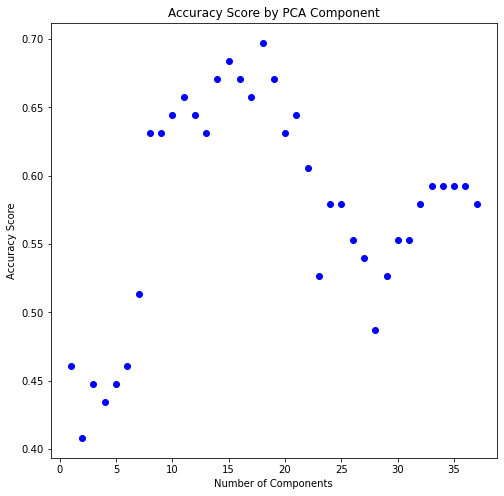

In [19]:
accuracy = np.array(accuracy)
plt.figure(figsize=(8, 8))
plt.scatter(accuracy[:,1], accuracy[:,0], color="blue")
plt.xlabel("Number of Components")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score by PCA Component")

maximum = np.max(accuracy[:,0])
index = np.where(accuracy[:,0] == maximum)
print(maximum, index)

Choose to work with 17 components

In [20]:
# 10 vector split
final_pca = PCA(n_components=10, whiten=True)
final_pca.fit(train_vectors)

pca_train_vectors = final_pca.transform(train_vectors)
pca_test_vectors = final_pca.transform(test_vectors)

In [21]:
# Grid search for random forest
param_grid_rf = {'n_estimators': [100, 500, 1000],
                 'max_depth': [3, 5, 7],
                 'max_features' : ["auto", 3, 5, 7]}
clf_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf)
clf_rf.fit(pca_train_vectors, train_labels)
print(clf_rf.best_estimator_)

RandomForestClassifier(max_depth=5, max_features=7, n_estimators=1000)


In [22]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=5, max_features=5)
rf.fit(X=pca_train_vectors, y=train_labels)

predictions = rf.predict(pca_test_vectors)
print(predictions)
error = metrics.mean_absolute_error(test_labels, predictions)
r_squared = metrics.r2_score(test_labels, predictions)

print(error, r_squared)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0
 1 1]
0.7105263157894737 0.039089663892108106


In [23]:
print(classification_report(test_labels, predictions))
print(confusion_matrix(test_labels, predictions, labels=range(5)))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76        35
           1       0.40      0.85      0.54        20
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2

    accuracy                           0.57        76
   macro avg       0.20      0.27      0.22        76
weighted avg       0.47      0.57      0.49        76

[[26  9  0  0  0]
 [ 3 17  0  0  0]
 [ 2  9  0  0  0]
 [ 1  4  0  0  0]
 [ 1  2  0  0  0]]


## Prediction

In [24]:
nhl_pred_data = pd.read_csv("nhl_data_2020-21.csv")
nhl_pred_data.sort_values(by=["Team"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(nhl_pred_data.shape)
nhl_pred_data.head()

(31, 23)


Team    Season  GP   W   L   T  OT   P     P%  RW  ...   GA  \
0    Anaheim Ducks  20202021  46  14  25  --   7  35  0.380   9  ...  145   
1  Arizona Coyotes  20202021  45  20  20  --   5  45  0.500  16  ...  139   
2    Boston Bruins  20202021  43  25  12  --   6  56  0.651  18  ...  108   
3   Buffalo Sabres  20202021  45  12  26  --   7  31  0.344   9  ...  151   
4   Calgary Flames  20202021  44  19  22  --   3  41  0.466  16  ...  128   

   GF/GP  GA/GP   PP%   PK%  Net PP%  Net PK%  Shots/GP  SA/GP  FOW%  
0   2.22   3.15  10.7  78.8      6.8     80.3      26.9   31.2  51.2  
1   2.62   3.09  20.0  79.7     17.3     81.2      26.6   30.8  47.7  
2   2.81   2.51  22.0  85.7     18.2     91.2      32.3   27.6  55.6  
3   2.40   3.36  21.4  78.3     19.6     81.7      27.8   32.8  50.3  
4   2.61   2.91  20.0  81.2     17.1     82.6      29.9   29.0  50.2  

[5 rows x 23 columns]

In [25]:
advanced_pred_data = pd.read_csv("advanced_data_2020-21.csv", skiprows=1)

for i in range(len(advanced_teams)):
    advanced_pred_data["Tm"].replace(to_replace = advanced_teams[i], value = nhl_teams[i], inplace=True)

advanced_pred_data.sort_values(by=["Tm"], axis=0, ascending=True, inplace=True, ignore_index=True)
print(advanced_pred_data.shape)
advanced_pred_data.head()

(31, 19)


Rk               Tm   Season    CF    CA   CF%    FF    FA   FF%  oiSH%  \
0  11    Anaheim Ducks  2020-21  2038  2195  48.1  1496  1647  47.6    8.5   
1  23  Arizona Coyotes  2020-21  1915  2102  47.7  1418  1567  47.5    8.7   
2  12    Boston Bruins  2020-21  2020  1783  53.1  1582  1356  53.8    7.2   
3  22   Buffalo Sabres  2020-21  1930  2165  47.1  1505  1720  46.7    7.5   
4  10   Calgary Flames  2020-21  2053  1880  52.2  1527  1439  51.5    7.9   

   oiSV%   PDO  oZS%  dZS%   FOW   FOL   FO%   HIT  BLK  
0   90.6  99.1  49.1  50.9  1105  1037  51.6  1031  548  
1   90.5  99.2  47.7  52.3   948  1034  47.8  1050  535  
2   91.3  98.6  53.1  46.9  1054   871  54.8  1002  427  
3   90.1  97.5  48.9  51.1  1015  1024  49.8   780  445  
4   90.6  98.5  53.9  46.1   964   957  50.2   915  441

In [26]:
names = ["CF", "CA", "CF%", "FF", "FA", "FF%", "oiSH%", "oiSV%", "PDO", "oZS%", "dZS%", "FOW", "FOL", "FO%",
         "HIT", "BLK"]
cols = [advanced_pred_data["CF"], advanced_pred_data["CA"], advanced_pred_data["CF%"], advanced_pred_data["FF"],
        advanced_pred_data["FA"], advanced_pred_data["FF%"], advanced_pred_data["oiSH%"], advanced_pred_data["oiSV%"],
        advanced_pred_data["PDO"], advanced_pred_data["oZS%"], advanced_pred_data["dZS%"], advanced_pred_data["FOW"],
        advanced_pred_data["FOL"], advanced_pred_data["FO%"], advanced_pred_data["HIT"], advanced_pred_data["BLK"]]

for i in range(len(names)):
    index = len(nhl_pred_data.columns)
    nhl_pred_data.insert(loc=index, column=names[i], value=cols[i])

In [27]:
nhl_pred_data.head()

Team    Season  GP   W   L   T  OT   P     P%  RW  ...  oiSH%  \
0    Anaheim Ducks  20202021  46  14  25  --   7  35  0.380   9  ...    8.5   
1  Arizona Coyotes  20202021  45  20  20  --   5  45  0.500  16  ...    8.7   
2    Boston Bruins  20202021  43  25  12  --   6  56  0.651  18  ...    7.2   
3   Buffalo Sabres  20202021  45  12  26  --   7  31  0.344   9  ...    7.5   
4   Calgary Flames  20202021  44  19  22  --   3  41  0.466  16  ...    7.9   

   oiSV%   PDO  oZS%  dZS%   FOW   FOL   FO%   HIT  BLK  
0   90.6  99.1  49.1  50.9  1105  1037  51.6  1031  548  
1   90.5  99.2  47.7  52.3   948  1034  47.8  1050  535  
2   91.3  98.6  53.1  46.9  1054   871  54.8  1002  427  
3   90.1  97.5  48.9  51.1  1015  1024  49.8   780  445  
4   90.6  98.5  53.9  46.1   964   957  50.2   915  441  

[5 rows x 39 columns]